## EDA of international Football Matches

In this notebook we will take a closer look into the evolution of international football matches (i.e. matches played between countries) through the years.

#### Questions to be explored:
- How the international football scenario change over the years?    
    - More games? 
    - Percentage of each continent in the total of games
    - Teams from different continents play with each other more or less today than they did in the past?
    - Did more different teams win games today than in the past? (não existe mais bobo no futebol)


- How is the performance of a winning world cup team in the years the preceed the tournament?
    - How many games?
    - How many wins, losses, draws?
    - How is the performance in the year before the WC?
    - If its a team from America, how many games they played agaist european teams?

    
- How is Brazil comming to this World Cup comparing to the recent World Cups?


#### Columns of results.csv:
- **date**: Date of the match
- **home_team**: Name of the home team
- **away_team**: Name of the away team
- **home_score**: Home team goals
- **away_score**: Away team goals
- **tournament**: Tournament name
- **city**: City where the match took place
- **country**: Country where the match took place.
- **neutral**: Whether the match took place at a neutral venue or not.

In [29]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [34]:
# Start the analysis by reading the results file from the "data" folder
df_results = pd.read_csv("data/results.csv")

# Convert the date column to datetime
df_results['date']  = pd.to_datetime(df_results['date'])

print(f"There are {len(df_results)} matches")
print(f"The first game was {df_results['date'].min().date()} and the last was {df_results['date'].max().date()}")

df_results.head(5)

There are 43752 matches
The first game was 1872-11-30 and the last was 2022-06-14


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [35]:
# Creating some new columns that might be usefull

def get_game_outcome ( home_score, away_score):
    """
    The outcome will be encoded as:
        - D: Draw
        - H: Home team wins
        - A: Away team wins
    """
    if (home_score == away_score):
        return 'D' # Draw
    elif (home_score > away_score):
        return 'H' # Home team wins
    elif (home_score < away_score):
        return 'A' # Away team wins

def winning_team(home_team, away_team, outcome):
    if (outcome == 'H'):
        return home_team
    elif (outcome == 'A'):
        return away_team
    else:
        return '-'

def losing_team(home_team, away_team, outcome):
    if (outcome == 'A'):
        return home_team
    elif (outcome == 'H'):
        return away_team
    else:
        return '-'

# The outcome of the game
df_results['outcome'] = df_results.apply(lambda x: get_game_outcome(x.home_score, x.away_score), axis=1)

# Name of the winning team
df_results['winning_team'] =  df_results.apply(lambda x: winning_team(x.home_team, x.away_team, x.outcome), axis=1)

# Name of the losing team
df_results['losing_team'] =  df_results.apply(lambda x: losing_team(x.home_team, x.away_team, x.outcome), axis=1)

# Score difference
df_results['score_difference'] = df_results.apply(lambda x: abs(x.home_score - x.away_score), axis=1)

# Teams envolved on the match
df_results['teams_envolved'] = df_results.apply(lambda x: [x.home_team, x.away_team], axis = 1)

# Year of the game
df_results['year'] = df_results['date'].apply(lambda x: x.year)

# Month of the game
df_results['month'] = df_results['date'].apply(lambda x: x.month_name())

# Day of the game
df_results['day'] = df_results['date'].apply(lambda x: x.day)

# Day of the week of the game
df_results['day_name'] = df_results['date'].apply(lambda x: x.day_name())

# The home team actually play at home?
df_results['home_playing_home'] = df_results.apply(lambda x: 'y' if x.home_team == x.country else 'n', axis = 1)

df_results['date'] = df_results['date'].apply(lambda x: x.date())

In [36]:
df_geo_regions = pd.read_csv('data/geographic-regions.csv')
df_geo_regions.fillna('-', inplace = True)
df_geo_regions.rename(columns = {'Country or Area':'country_reff', 'Region Name':'continent'}, inplace = True)

missing_countries_dict = {
                            'England':'Europe',
                            'Scotland':'Europe',
                            'Wales':'Europe',
                            'Turkey':'Europe',
                            'Tanzania':'Africa',
                            'China PR':'Asia',
                            'Republic of Ireland':'Europe',
                            'Iran':'Asia',
                            'Northern Ireland':'Europe',
                            'Russia':'Europe',
                            'Ivory Coast':'Africa',
                            'Yugoslavia':'Europe',
                            'Hong Kong':'Asia',
                            'Bolivia':'Americas',
                            'Czechoslovakia':'Europe',
                            'Venezuela':'Americas',
                            'Soviet Union':'Europe',
                            'Czech Republic':'Europe',
                            'Vietnam':'Asia',
                            'German DR':'Europe',
                            'Syria':'Asia',
                            'Malaya':'Asia',
                            'Moldova':'Europe',
                            'DR Congo':'Africa',
                            'Cape Verde':'Africa',
                            'Netherlands Antilles':'Americas',
                            'Vietnam Republic':'Asia',
                            'Zaïre':'Africa',
                            'Taiwan':'Asia',
                            'Laos':'Asia'
}

def get_continent ( label, df_results ):
    df_merged = df_results.merge(df_geo_regions[['country_reff','continent']], how = 'left', left_on =label, right_on = 'country_reff')
    df_merged['continent'] = df_merged['continent'].fillna('-')
    return df_merged.apply(lambda x: missing_countries_dict.get(x[label], "not found") if x.continent == '-' else x.continent, axis=1 )

# Get the continent of the game, the away_team and the home_team
df_results['game_continent'] = get_continent ( 'country', df_results )
df_results['home_team_continent'] = get_continent ( 'home_team', df_results )
df_results['away_team_continent'] = get_continent ( 'away_team', df_results )

# The home team is playing in their continent?
df_results['home_playing_continent'] = df_results.apply(lambda x: 'y' if x.home_team_continent == x.game_continent else 'n', axis = 1)

# The away team is playing in their continent?
df_results['away_playing_continent'] = df_results.apply(lambda x: 'y' if x.away_team_continent == x.game_continent else 'n', axis = 1)

# Both of the teams are from the same continent?
df_results['same_continent'] = df_results.apply(lambda x: 'y' if x.away_team_continent == x.home_team_continent else 'n', axis = 1)

# Continents envolved on the match
df_results['continents_envolved'] = df_results.apply(lambda x: [x.home_team_continent, x.away_team_continent], axis = 1)

#df_merged[df_merged['Region Name'].isna() == True]['country'].value_counts().head(50)

### How the international football scenario change over the years? 

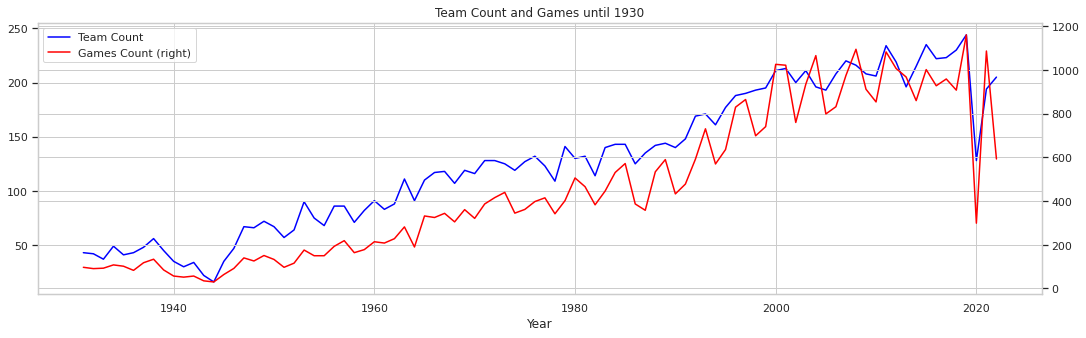

In [37]:
# Count how many different teams played international matches in each year
df_filtered = df_results[df_results['year'] > 1930]

list_team_count = []
for y in df_filtered['year'].unique():
    matches_list = df_filtered.groupby(by = 'year').get_group(y)['teams_envolved'].to_list()
    countries = [m[0] for m in matches_list] # Gets the home team
    countries.extend([m[1] for m in matches_list]) # Gets the away team
    list_team_count.append(len(set(countries)))

series_team_count = pd.Series(index=df_filtered['year'].unique(), data=list_team_count)
series_game_count = df_filtered['year'].value_counts(sort = False)


plt.figure(figsize=(18,5))
plt.xlabel('Year')
plt.title("Team Count and Games until 1930")

ax1 = series_team_count.plot(color='blue', grid=True, label='Team Count')
ax2 = series_game_count.plot(color='red', grid=True, secondary_y=True, label='Games Count')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

<AxesSubplot:title={'center':'Percentage of games for continent'}>

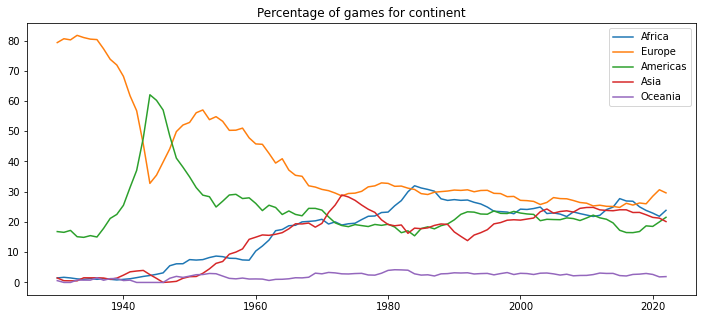

In [6]:
# What percentage of teams each continent had over the years
df_filtered = df_results[df_results['year'] > 1926]


list_continent_count = []
for y in df_filtered['year'].unique():
    matches_list = df_filtered.groupby(by = 'year').get_group(y)['continents_envolved'].to_list()
    continents = [m[0] for m in matches_list] # Gets the home team continent
    continents.extend([m[1] for m in matches_list]) # Gets the away team continent
    # Count of many of each continent we have
    africa = len([a for a in continents if a == 'Africa'])
    europe = len([a for a in continents if a == 'Europe'])
    americas = len([a for a in continents if a == 'Americas'])
    asia = len([a for a in continents if a == 'Asia'])
    oceania = len([a for a in continents if a == 'Oceania'])
    not_found = len([a for a in continents if a == 'not found'])

    list_continent_count.append([africa, europe, americas, asia, oceania, not_found])

df_contient_count = pd.DataFrame(index=df_filtered['year'].unique(), 
                                data=list_continent_count, 
                                columns = ['Africa', 'Europe', 'Americas', 'Asia', 'Oceania', 'not found'])

# Sum to get the total for each year
df_contient_count['total'] = df_contient_count.sum(axis=1)

# Calculate the roling mean of 4 years to have a smoother plot
df_contient_count = df_contient_count.rolling(4).mean().dropna()

# Calculate the percentage for each year
for c in [c for c in df_contient_count.columns if c != 'total']:
    df_contient_count[c] = df_contient_count.apply(lambda x: round(100*(x[c]/x['total']),2), axis = 1)

xticks_values = np.arange(1930, 2026, 4).tolist()
df_contient_count[['Africa', 'Europe', 'Americas', 'Asia', 'Oceania']].plot(figsize=(12,5),
                                                                            title = "Percentage of games for continent",
                                                                            xticks = xticks_values)

<AxesSubplot:title={'center':'Percentage of matches with different continents teams'}>

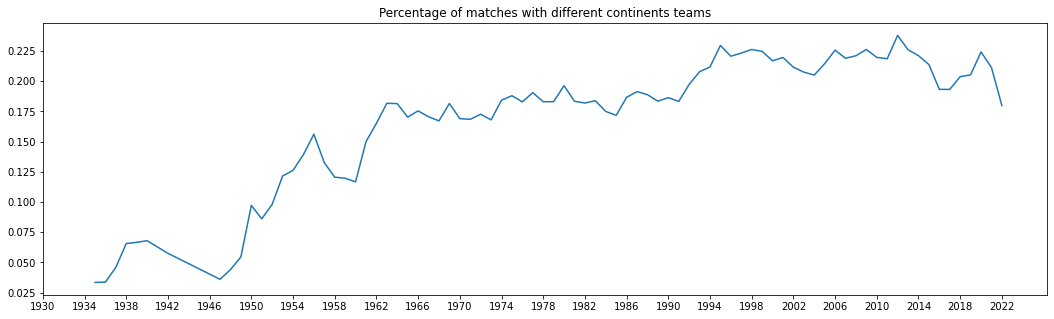

In [7]:
# Teams from diffent continent play with each other more or less they did in the past
# Count how many different teams played international matches in each year
df_filtered_continent = df_results[(df_results['year'] > 1930) & (df_results['same_continent'] == 'n')]
df_filtered = df_results[df_results['year'] > 1930]

series_diff_continents_count = df_filtered_continent['year'].value_counts(sort = False)
series_game_count = df_filtered['year'].value_counts(sort = False)

# Plot the rolling mean to get a smoother value
xticks_values = np.arange(1930, 2026, 4).tolist()
(series_diff_continents_count/series_game_count).dropna().rolling(4).mean().dropna().plot(figsize=(18,5),
                                                                                          title = "Percentage of matches with different continents teams",
                                                                                          xticks = xticks_values)

<AxesSubplot:title={'center':'Percentage of matches Europeans vs Americans'}>

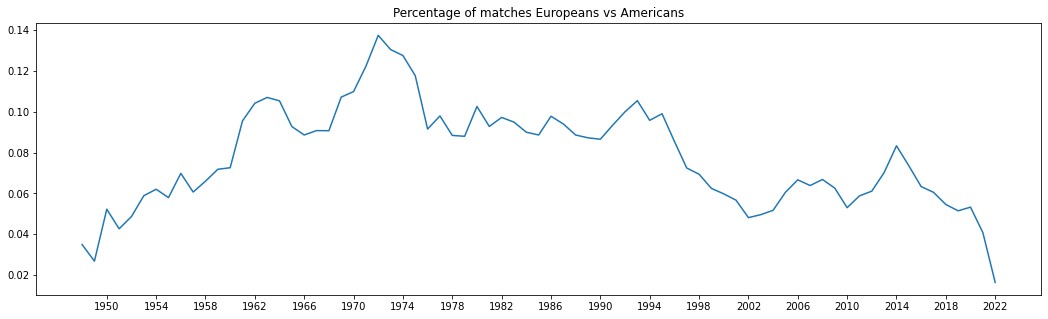

In [42]:
# European and American teams now play less with each other

# Total of games that had at least one european or one american
df_america_or_europe = df_results[(df_results['year'] > 1930) & ((df_results['home_team_continent'] == 'Americas') | 
                                                                (df_results['home_team_continent'] == 'Europe') | 
                                                                (df_results['away_team_continent'] == 'Americas') |
                                                                (df_results['away_team_continent'] == 'Europe'))]

# Total of games that Amreicans and Europeans play each other
df_america_vs_europe = df_results[(df_results['year'] > 1930) & (((df_results['home_team_continent'] == 'Americas') & 
                                                                (df_results['away_team_continent'] == 'Europe')) | 
                                                                ((df_results['home_team_continent'] == 'Europe') & 
                                                                (df_results['away_team_continent'] == 'Americas')))]


america_or_europe_count = df_america_or_europe['year'].value_counts(sort = False)
america_vs_europe_count = df_america_vs_europe['year'].value_counts(sort = False)

# Plot the rolling mean to get a smoother value
xticks_values = np.arange(1950, 2026, 4).tolist()
(america_vs_europe_count/america_or_europe_count).dropna().rolling(4).mean().dropna().plot(figsize=(18,5),
                                                                                          title = "Percentage of matches Europeans vs Americans",
                                                                                          xticks = xticks_values)

<AxesSubplot:title={'center':'Percentage of teams that win games'}, xlabel='year'>

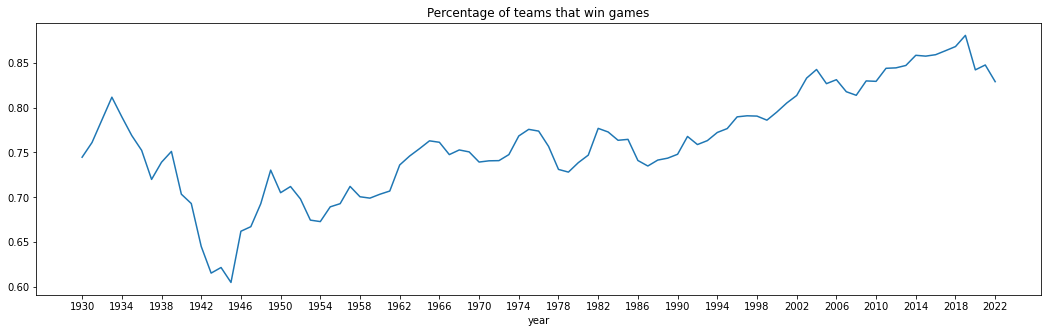

In [17]:
# Did more different teams win games today than in the past?
df_filtered = df_results[df_results['year'] > 1926]

# Quantos times venceram / total de times que jogou

df_list_count = []
for y in df_filtered['year'].unique():
    df_year = df_filtered.groupby(by = 'year').get_group(y)
    matches_list = df_year['teams_envolved'].to_list()
    countries = [m[0] for m in matches_list] # Gets the home team
    countries.extend([m[1] for m in matches_list]) # Gets the away team
    total_countries = len(set(countries))
    winning_teams_list = []
    for i,row in df_year.iterrows():
        if (row['outcome'] == 'H'): # Home teams wins
            winning_teams_list.append(row['home_team'])
        elif(row['outcome'] == 'A'): # Away team wins
            winning_teams_list.append(row['away_team'])
    total_winners = len(set(winning_teams_list)) # Gets unique countries that win at least one game
    df_list_count.append([y,total_countries,total_winners])

df_winners = pd.DataFrame(df_list_count, columns = ['year', 'total_countries', 'total_winners'])

df_winners['ratio'] = df_winners['total_winners'] / df_winners['total_countries'] 

xticks_values = np.arange(1930, 2026, 4).tolist()
df_winners.set_index('year').rolling(4).mean().dropna()['ratio'].plot(figsize=(18,5),
                                                                        title = "Percentage of teams that win games",
                                                                        xticks = xticks_values)


### How is the performance of a winning world cup team in the years the preceed the tournament?

In [6]:
df_wc_games = pd.read_csv("data/WorldCupMatches.csv").dropna()
df_wc_winners = pd.read_csv("data/WorldCups.csv").dropna()

df_wc_games['Year'] = df_wc_games['Year'].apply(int)
df_wc_games['Datetime'] = pd.to_datetime(df_wc_games['Datetime']).apply(lambda x: x.date())
df_wc_winners['Winner'] = df_wc_winners['Winner'].apply(lambda x: 'Germany' if x.__contains__('Germany') else x)

# Get the first and last day of the world cup
wc_start_end_list = []
for y in df_wc_games['Year'].unique():
    df_year = df_wc_games.groupby(by = 'Year').get_group(y)
    winner = df_wc_winners.groupby(by = 'Year').get_group(y)['Winner'].to_list()[0]
    wc_start_end_list.append([y, df_year['Datetime'].min(), df_year['Datetime'].max(), winner])

# The data only goes until 2014, so we manually add the Data from 2018
wc_start_end_list.append([2018, datetime(2018,6,14).date(), datetime(2018,7,15).date(), 'France'])

df_wc_start_end = pd.DataFrame(wc_start_end_list, columns = ['year', 'date_start', 'date_end','winner'])

# Get a dictionary that has the Country names as Keys and the Continent as Values
total_unique_countries = pd.concat([df_results['home_team'], df_results['away_team']]).unique()
dict_country_continent = {}
for c in total_unique_countries:
    try: 
        dict_country_continent[c] = df_results[df_results['home_team'] == c]['home_team_continent'].unique()[0]
    except:
        # If the team never had a game playing home
        dict_country_continent[c] = df_results[df_results['away_team'] == c]['away_team_continent'].unique()[0]

# Adding the continents
df_wc_start_end['continent'] = df_wc_start_end['winner'].apply(lambda x: dict_country_continent[x])

In [15]:
df_wc_start_end.head(5)

,year,date_start,date_end,winner,continent
0,1930,1930-07-13,1930-07-30,Uruguay,Americas
1,1934,1934-05-27,1934-06-10,Italy,Europe
2,1938,1938-06-04,1938-06-19,Italy,Europe
3,1950,1950-06-24,1950-07-16,Uruguay,Americas
4,1954,1954-06-16,1954-07-04,Germany,Europe


#### How many games, wins, losses, draws?

In [13]:
wc_history_list = []
for i in range(1,len(df_wc_start_end)):
    start_cycle_year = df_wc_start_end['year'][i-1] # year that start the next wc cycle
    end_cycle_year = df_wc_start_end['year'][i] # wc year, that ends the wc cycle
    future_wc_winner = df_wc_start_end['winner'][i] # team that end up winning the WC

    df_wc_cycle = df_results[(df_results['teams_envolved'].apply(lambda x: x.__contains__(future_wc_winner))) &
                        (df_results['date'] > df_wc_start_end[df_wc_start_end['year'] == start_cycle_year]['date_end'].max()) & # greater than the end of last WC
                        (df_results['date'] < df_wc_start_end[df_wc_start_end['year'] == end_cycle_year]['date_start'].min())]  # smaller than the begging of current wc

    total_games_played = len(df_wc_cycle)
    w = 0
    l = 0
    d = 0
    for t in df_wc_cycle['winning_team']:
        if (t == future_wc_winner): # How many wins the team had
            w+=1
        elif (t == '-'): # How many draws the team had
            d += 1
        else:
            l += 1 # How many losses the team had

    wc_history_list.append([end_cycle_year, future_wc_winner, total_games_played, w, d, l])
    # print(df_wc_start_end['year'][i-1],df_wc_start_end['year'][i], df_wc_start_end['winner'][i])

df_wc_history = pd.DataFrame(wc_history_list, columns = ['wc_year', 'winner', 'games_played', 'wins', 'draws', 'losses'])

In [42]:
def show_values(axs, orient="v", space=.01):
    """
    Function extracted from: https://www.statology.org/seaborn-barplot-show-values/
    """
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

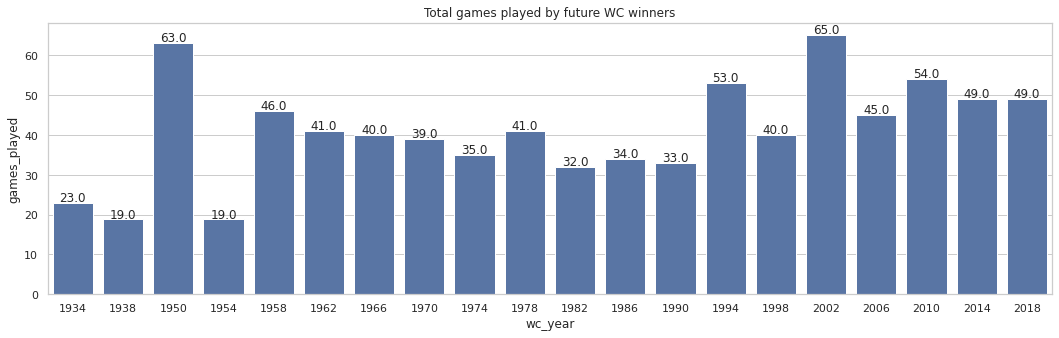

In [41]:
plt.figure(figsize=(18,5))
plt.title("Total games played by future WC winners")
sns.set_theme(style="whitegrid")
p = sns.barplot(data = df_wc_history, x= 'wc_year', y='games_played', color = 'b')

#show values on barplot
show_values(p)

<AxesSubplot:title={'center':'Percentage of wins, draws, losses'}, xlabel='wc_year'>

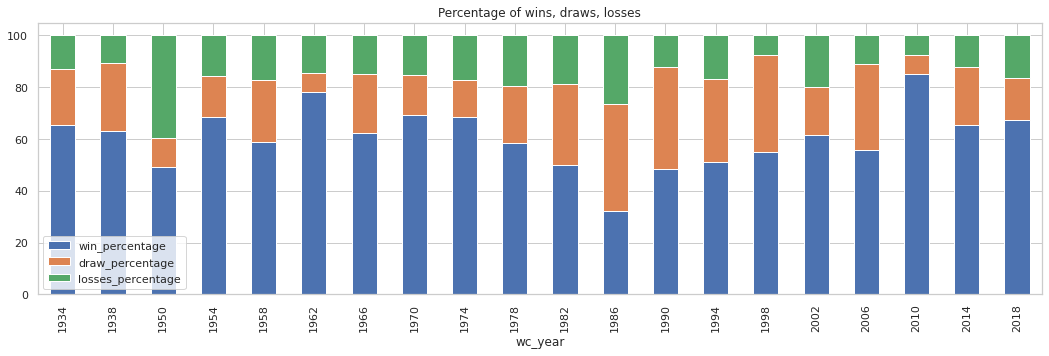

In [62]:
df_wc_history['win_percentage'] = (df_wc_history['wins'] / df_wc_history['games_played']).apply(lambda x: round(100*x,2))
df_wc_history['draw_percentage'] = (df_wc_history['draws'] / df_wc_history['games_played']).apply(lambda x: round(100*x,2))
df_wc_history['losses_percentage'] = (df_wc_history['losses'] / df_wc_history['games_played']).apply(lambda x: round(100*x,2))

df_wc_history.drop(columns = ['winner', 'games_played', 'wins', 'draws', 'losses']).set_index('wc_year').plot(kind = 'bar',
                                                                                                                 stacked=True,
                                                                                                                 figsize=(18,5),
                                                                                                                 title = "Percentage of wins, draws, losses")

#### How is the performance in the year before the WC

<AxesSubplot:title={'center':'Percentage of wins, draws, losses'}, xlabel='wc_year'>

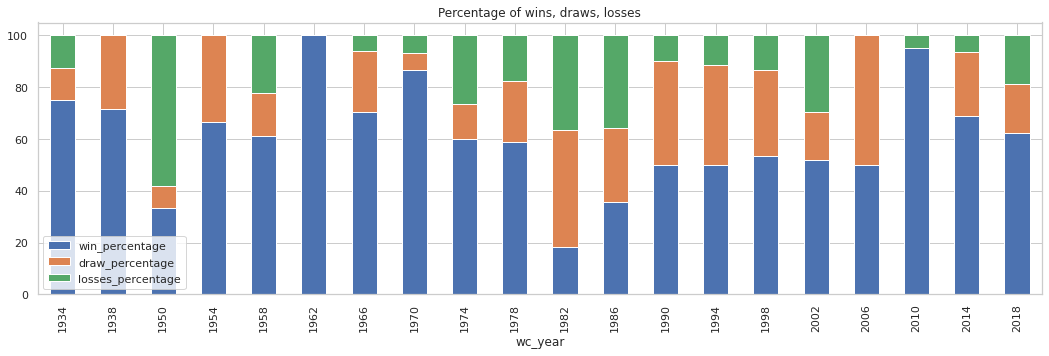

In [116]:
wc_history_list = []
for i in range(1,len(df_wc_start_end)):
    start_cycle_year = df_wc_start_end['year'][i-1] # year that start the next wc cycle
    end_cycle_year = df_wc_start_end['year'][i] # wc year, that ends the wc cycle
    future_wc_winner = df_wc_start_end['winner'][i] # team that end up winning the WC

    df_wc_cycle = df_results[(df_results['teams_envolved'].apply(lambda x: x.__contains__(future_wc_winner))) &
                        (df_results['date'] > datetime(end_cycle_year - 1,1,1).date()) & # greater than the beginign of the year that preceds the WC
                        (df_results['date'] < df_wc_start_end[df_wc_start_end['year'] == end_cycle_year]['date_start'].min())]  # smaller than the begging of current wc

    total_games_played = len(df_wc_cycle)
    w = 0
    l = 0
    d = 0
    for t in df_wc_cycle['winning_team']:
        if (t == future_wc_winner): # How many wins the team had
            w+=1
        elif (t == '-'): # How many draws the team had
            d += 1
        else:
            l += 1 # How many losses the team had

    wc_history_list.append([end_cycle_year, future_wc_winner, total_games_played, w, d, l])
    # print(df_wc_start_end['year'][i-1],df_wc_start_end['year'][i], df_wc_start_end['winner'][i])

df_wc_history = pd.DataFrame(wc_history_list, columns = ['wc_year', 'winner', 'games_played', 'wins', 'draws', 'losses'])

df_wc_history['win_percentage'] = (df_wc_history['wins'] / df_wc_history['games_played']).apply(lambda x: round(100*x,2))
df_wc_history['draw_percentage'] = (df_wc_history['draws'] / df_wc_history['games_played']).apply(lambda x: round(100*x,2))
df_wc_history['losses_percentage'] = (df_wc_history['losses'] / df_wc_history['games_played']).apply(lambda x: round(100*x,2))

df_wc_history.drop(columns = ['winner', 'games_played', 'wins', 'draws', 'losses']).set_index('wc_year').plot(kind = 'bar',
                                                                                                                 stacked=True,
                                                                                                                 figsize=(18,5),
                                                                                                                 title = "Percentage of wins, draws, losses")

#### When Brazil and Argentina won WC, did they play more with europeans in their preparation?

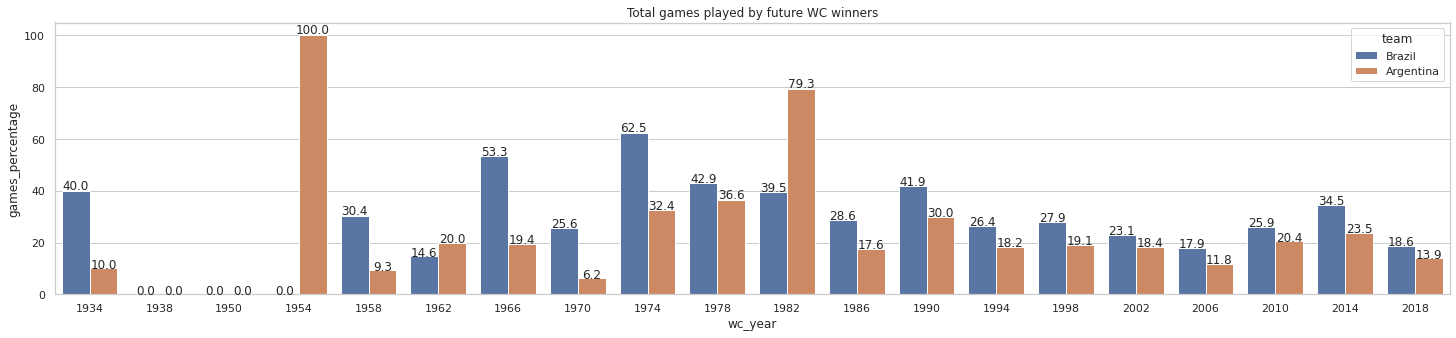

In [82]:
wc_history_list = []
for i in range(1,len(df_wc_start_end)):
    start_cycle_year = df_wc_start_end['year'][i-1] # year that start the next wc cycle
    end_cycle_year = df_wc_start_end['year'][i] # wc year, that ends the wc cycle
    for t in ['Brazil','Argentina']:
        # Filtering to get Brazil and Argentina game history for each WC cycle
        df_wc_cycle = df_results[(df_results['teams_envolved'].apply(lambda x: x.__contains__(t))) &
                            (df_results['date'] > df_wc_start_end[df_wc_start_end['year'] == start_cycle_year]['date_end'].max()) & # greater than the end of last WC
                            (df_results['date'] < df_wc_start_end[df_wc_start_end['year'] == end_cycle_year]['date_start'].min())]  # smaller than the begging of current wc
        total_games_played = len(df_wc_cycle)
        # Filter to get only the games played against europeans
        games_against_europeans = len(df_wc_cycle[df_wc_cycle['continents_envolved'].apply(lambda x: True if 'Europe' in x else False)])
        wc_history_list.append([end_cycle_year, t, total_games_played, games_against_europeans])

df_br_ar_history = pd.DataFrame(wc_history_list, columns=['wc_year', 'team', 'total_games_played', 'games_against_europeans'])

df_br_ar_history['games_percentage'] = (df_br_ar_history['games_against_europeans'] / df_br_ar_history['total_games_played']).apply(lambda x: round(100*x,2))

plt.figure(figsize=(25,5))
plt.title("Total games played by future WC winners")
sns.set_theme(style="whitegrid")
p = sns.barplot(data = df_br_ar_history, x = 'wc_year', y = 'games_percentage', hue = 'team' )
#show values on barplot
show_values(p)

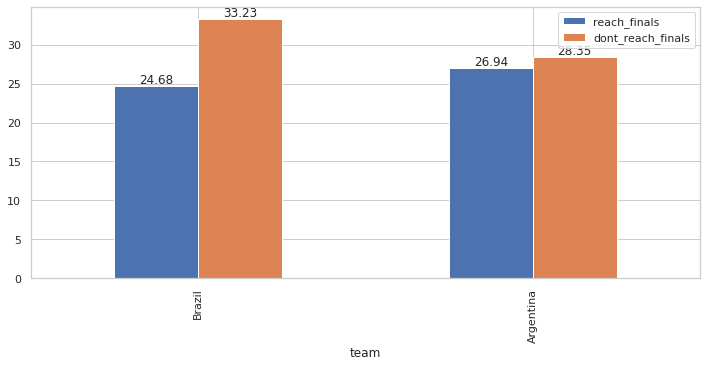

In [106]:
df_filtered = df_br_ar_history[df_br_ar_history['wc_year'] > 1950]

br_year_finals = [1950,1958,1962,1970,1994,1998,2002] # Years that brazil reach the WC final
ar_years_finals = [1978,1986,1990,2014] # Years that aregentina reach the WC final

dict_final_wc_years = {
    'Brazil':br_year_finals,
    'Argentina':ar_years_finals
}

df_list = []
for t in ['Brazil', 'Argentina']:
    # Percentage of games when the team reach the finals
    win_p = round(df_filtered[(df_filtered['team'] == t) & df_filtered['wc_year'].apply(lambda x: True if x in dict_final_wc_years[t] else False)]['games_percentage'].mean(),2)
    # Percentage of games when the team dont reach the finals
    loss_p = round(df_filtered[(df_filtered['team'] == t) & df_filtered['wc_year'].apply(lambda x: False if x in dict_final_wc_years[t] else True)]['games_percentage'].mean(),2)
    df_list.append([t,win_p,loss_p])


df_percenatge = pd.DataFrame(df_list, columns = ['team','reach_finals','dont_reach_finals'])

ax = df_percenatge.plot(kind = 'bar', x = 'team',figsize=(12,5))

for container in ax.containers:
    ax.bar_label(container)